# Chicago Car Crashes

# Overview

We used Chicago,IL car crash data from city of Chicago website the 3 data sets contain crash info, info on people involved and info on vehicles involved.

We used the 3 data sets below from the City of Chicago website and combined them.

Traffic Crashes - Crashes: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

Traffic Crashes - Vehicle: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3

Traffic Crashes - People: https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

# Business and Data Understanding

We started a software company to help car companys make their buyers feel safer. We are pitching the product to Mercedes Benz because they are a world reknown symbol of quality and class. The software is used to potentially save the life of a driver in the event of a car accident. Similar to that of a black box, the software takes record of the features occuring at the time of the accident and if they are highly correlated with those of previous fatal crashes, athorities are immediately notified of possible death. We created classification models to predict what the prime factors cause an accident that can result in a fatality. If successful and Mercedes Benz implements our recommendations, we will see a decrease in fatalities and an overall increase in safety for all citizens.

# Import Packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, plot_confusion_matrix, plot_roc_curve
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium 

# Load Data

In order to use run this data you must download the data sets from the following 3 links and store them in the folder above your notebook

1. https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if
2. https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3
3. https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

In [2]:
#importing datasets
df = pd.read_csv('../Traffic_Crashes_-_Crashes.csv')
df_people = pd.read_csv('../Traffic_Crashes_-_People.csv')
df_vehicles = pd.read_csv('../Traffic_Crashes_-_Vehicles.csv')
df.head()

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61,71) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


# Data Cleaning

Merge all three data sets together and drop duplicates. 

In [3]:
#Merging Datasets on the Crash_Record_ID Column
df_merge = pd.merge(df, df_vehicles, on='CRASH_RECORD_ID').reset_index()
df_merge_2 = pd.merge(df_merge, df_people, on='CRASH_RECORD_ID').reset_index()

#dropping dupllicates(checks CRASH_RECORD_ID for uniqueness)
df_dropped= df_merge_2.drop_duplicates(subset=['CRASH_RECORD_ID'], keep='first')

Reduce the data to only those rows with a driver listed and cut out outliers for older cars so that only cars from the 1970 and on are included. Then we reduced the data further to only the ten rows that will be used as features and our target variable 'INJURIES_FATAL'.

In [4]:
#only accidents with the driver
df_driver = df_dropped[df_dropped['PERSON_TYPE']=='DRIVER']
df_driver = df_driver[(df_driver.VEHICLE_YEAR>=1970) & (df_driver.VEHICLE_YEAR <=2021)]

#necessary columns, the other columns have little to no correlation to INJURIES_FATAL
new_columns = ['AGE', 'CRASH_HOUR','CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'POSTED_SPEED_LIMIT',
           'WEATHER_CONDITION','LIGHTING_CONDITION','TRAFFIC_CONTROL_DEVICE',
           'PHYSICAL_CONDITION','VEHICLE_DEFECT', 'LONGITUDE', 'LATITUDE','INJURIES_FATAL']

#Dataframe with the new columns
df_driver = df_driver[new_columns]

Drop rows with either NaN values or filler NaN values such as 'Unknown' and 'Other'. 

In [6]:
#dropping missing values
df_driver.dropna(axis=0, subset=['LATITUDE'], inplace =True)
df_driver.dropna(axis=0, subset=['LONGITUDE'], inplace =True)

In [6]:
#removing weather conditions that are either unknown or don't make sense
df_driver = df_driver[(df_driver.WEATHER_CONDITION != 'UNKNOWN')|
                      (df_driver.WEATHER_CONDITION != 'OTHER')|
                      (df_driver.WEATHER_CONDITION != 'BLOWING SAND, SOIL, DIRT')]
#removing other unknowns
df_driver = df_driver[df_driver.LIGHTING_CONDITION != 'UNKNOWN']
df_driver = df_driver[(df_driver.TRAFFIC_CONTROL_DEVICE != 'UNKNOWN')|(df_driver.TRAFFIC_CONTROL_DEVICE != 'OTHER')]
df_driver = df_driver[(df_driver.PHYSICAL_CONDITION != 'UNKNOWN')|(df_driver.PHYSICAL_CONDITION != 'OTHER')]

Make the target variable binary: 0 corresponding to non-fatal, 1 to fatal. 

In [7]:
#since we only care about whether or not a fatality occurred we are changing this to be true/false
df_driver.INJURIES_FATAL.replace({0.0:0, 1.0:1, 2.0:1, 3.0:1, 4.0:1}, inplace=True)
#replacing unknown ages with the median age
df_driver.AGE.replace({np.NAN: df_driver.AGE.median()},inplace=True)

In [8]:
df_driver.shape

(390577, 13)

Check the distribution of the columns of the dataset. 

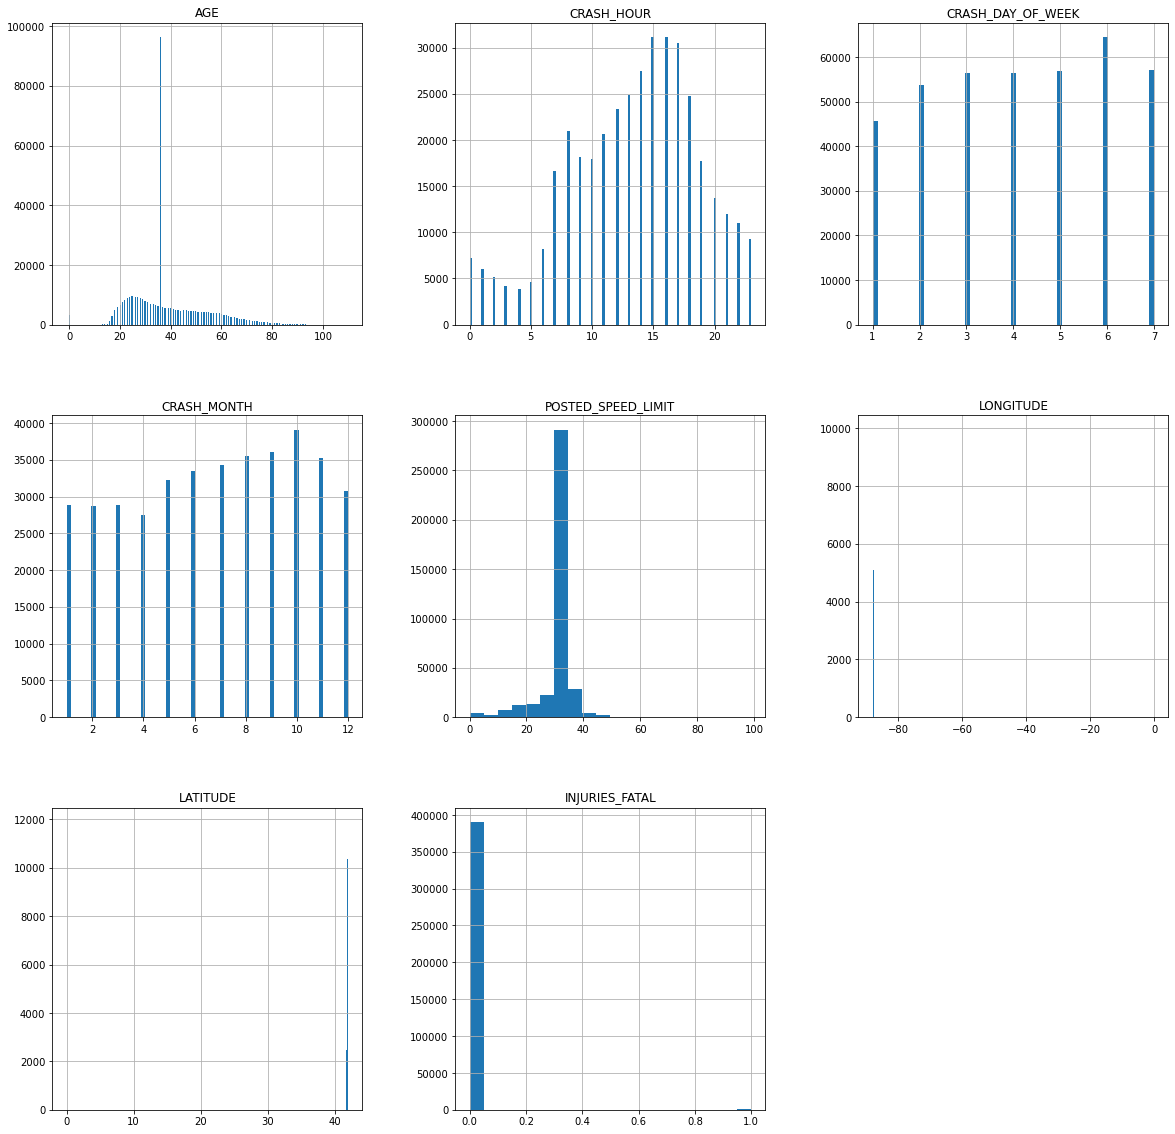

In [9]:
df_driver.hist(figsize=(20,20), bins='auto');

# Data Preperation

Store the features in a variable names 'X' and the target variable in 'y'.

In [3]:
X = df.drop('INJURIES_FATAL',axis=1)
y = df.INJURIES_FATAL

#### Train-Test Split

Split the data into training and testing sets. 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### One Hot Encoding 

Create binary columns for all values in categorical columns. 

In [5]:
#Ohe-ing Train set
X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(
    drop='first',
    sparse=False)

dums_train = ohe.fit_transform(X_train_cat)
dums_train_df = pd.DataFrame(dums_train,
                       columns=ohe.get_feature_names(),
                       index=X_train_cat.index)

nums_train_df = X_train.select_dtypes(['int64','float64'])

X_train_clean = pd.concat([nums_train_df, dums_train_df], axis=1)

In [6]:
#Ohe-ing Test set
X_test_cat = X_test.select_dtypes('object')

dums_test = ohe.transform(X_test_cat)
dums_test_df = pd.DataFrame(dums_test,
                       columns=ohe.get_feature_names(),
                       index=X_test_cat.index)

nums_test_df = X_test.select_dtypes(['int64','float64'])

X_test_clean = pd.concat([nums_test_df, dums_test_df], axis=1)

# Modeling

### Dummy Classfier 

Baseline model for comparision. 

In [156]:
dummy = DummyClassifier(random_state=42) 

#establishing random_state for reproducibility
dummy.fit(X_train_clean, y_train)
y_pred = dummy.predict(X_test_clean)

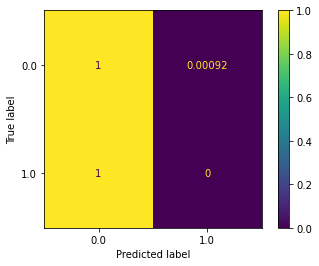

In [157]:
plot_confusion_matrix(estimator=dummy, X=X_test_clean, y_true=y_test, normalize='true');

In [158]:
y_train.value_counts(normalize=True)

0.0    0.998928
1.0    0.001072
Name: INJURIES_FATAL, dtype: float64

In [159]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.9977578704888661


### SMOTE

We have a class imbalance so we're trying to oversample the minority class of our target.

In [7]:
# X_train_clean.columns
smote = SMOTE(sampling_strategy='auto',random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_clean, y_train) 

### Dummy Classfier with SMOTE

Baseline model with SMOTE adjustment. 

In [148]:
dummy_smote = DummyClassifier(random_state=42)
dummy_smote.fit(X_train_resampled, y_train_resampled)
y_pred_dummy_sm = dummy_smote.predict(X_test)

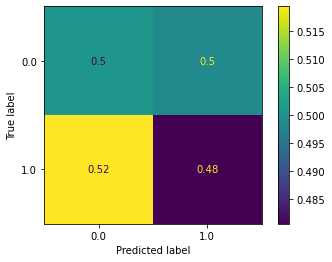

In [149]:
plot_confusion_matrix(estimator=dummy_smote, X=X_test_clean, y_true=y_test, normalize='true');

In [150]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred_dummy_sm)))

Accuracy Score: 0.5009367801382134


### Decision Tree

In [105]:
tree = DecisionTreeClassifier()

Doing a grid search to find the best parameters

In [106]:
tree_grid = {'max_leaf_nodes': [4, 5, 6, 7], 
             'min_samples_split': [2, 3, 4],
             'max_depth': [2, 3, 4, 5],
            }

In [107]:
tree_grid_search = GridSearchCV(tree, tree_grid, cv=5)

In [108]:
tree_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4]})

In [109]:
tree_grid_search.best_params_

{'max_depth': 5, 'max_leaf_nodes': 7, 'min_samples_split': 2}

In [110]:
tree_grid_search.best_score_

0.9023948618086161

In [111]:
tree_grid_search.best_estimator_.score(X_test_clean, y_test)

0.917952393140517

In [112]:
best_tree = tree_grid_search.best_estimator_

In [113]:
tree_test_preds = best_tree.predict(X_test_clean)

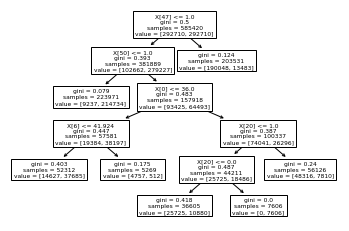

In [165]:
#creating a visualization of the decision tree
plot_tree(best_tree)
plt.savefig('images/decision_tree.png');

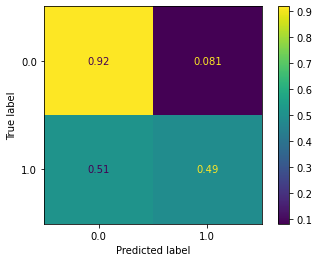

In [136]:
plot_confusion_matrix(best_tree, X_test_clean, y_test, normalize='true')
plt.savefig('images/tree_conf_matrix.png');

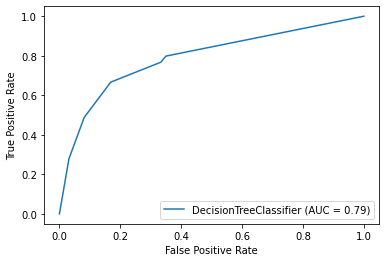

In [137]:
plot_roc_curve(best_tree, X_test_clean, y_test)
plt.savefig('images/tree_roc.png');

In [116]:
#prints all relevant metrics of a model, this will be reused so we're defining it here
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [117]:
print_metrics(y_test, tree_test_preds)

Precision Score: 0.007864186743228061
Recall Score: 0.4883720930232558
Accuracy Score: 0.917952393140517
F1 Score: 0.015479115479115478


In [125]:
tree_features = list(zip(best_tree.feature_importances_, X_train_resampled.columns.values))
tree_features = sorted(tree_features, key=lambda x: x[0], reverse=True)
tree_features_values = [x[0] for x in tree_features][:4]
tree_features_names = [x[1] for x in tree_features][:4]

In [126]:
df.head()

,AGE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFIC_CONTROL_DEVICE,PHYSICAL_CONDITION,VEHICLE_DEFECT,LONGITUDE,LATITUDE,INJURIES_FATAL
0,31.0,17,4,7,35,CLEAR,DAYLIGHT,NO CONTROLS,NORMAL,UNKNOWN,-87.773288,41.919664,0.0
1,20.0,16,6,6,35,CLEAR,DAYLIGHT,STOP SIGN/FLASHER,UNKNOWN,UNKNOWN,-87.740954,41.741804,0.0
2,50.0,10,6,7,30,CLEAR,DAYLIGHT,TRAFFIC SIGNAL,NORMAL,UNKNOWN,-87.585022,41.773456,0.0
3,36.0,1,7,7,30,CLEAR,DARKNESS,NO CONTROLS,UNKNOWN,NONE,-87.622115,41.802119,0.0
4,45.0,22,5,3,30,CLEAR,"DARKNESS, LIGHTED ROAD",TRAFFIC SIGNAL,NORMAL,UNKNOWN,-87.740954,41.741804,0.0


Checking how much accuracy the model loses by excluding each variable

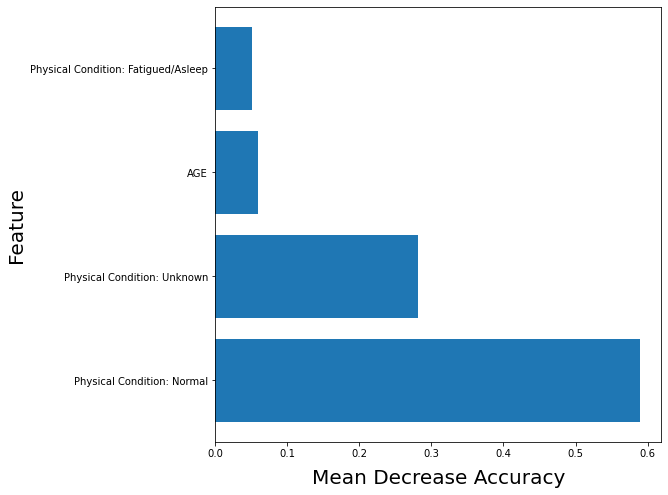

In [135]:
plt.figure(figsize=(8,8))
tree_labels = ['Physical Condition: Normal', 'Physical Condition: Unknown', 'AGE',
               'Physical Condition: Fatigued/Asleep']
plt.barh(tree_features_names, tree_features_values, align='center', tick_label=tree_labels)
plt.xlabel('Mean Decrease Accuracy', fontsize=20, labelpad=10)
plt.ylabel('Feature', fontsize=20)
plt.savefig('images/tree_feature_plot.png');

In [128]:
tree_cv_df = pd.DataFrame(tree_grid_search.cv_results_)
tree_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.977304,0.139740,0.019456,0.002555,2,4,2,"{'max_depth': 2, 'max_leaf_nodes': 4, 'min_sam...",0.850424,0.851722,0.85144,0.851414,0.850116,0.851023,0.000632,37
1,0.897817,0.008857,0.017474,0.000178,2,4,3,"{'max_depth': 2, 'max_leaf_nodes': 4, 'min_sam...",0.850424,0.851722,0.85144,0.851414,0.850116,0.851023,0.000632,37
2,0.887219,0.007858,0.017654,0.000324,2,4,4,"{'max_depth': 2, 'max_leaf_nodes': 4, 'min_sam...",0.850424,0.851722,0.85144,0.851414,0.850116,0.851023,0.000632,37
3,0.894236,0.010971,0.017588,0.000127,2,5,2,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.850424,0.851722,0.85144,0.851414,0.850116,0.851023,0.000632,37
4,0.887710,0.005493,0.017568,0.000326,2,5,3,"{'max_depth': 2, 'max_leaf_nodes': 5, 'min_sam...",0.850424,0.851722,0.85144,0.851414,0.850116,0.851023,0.000632,37


### Random Forest

In [24]:
forest = RandomForestClassifier()

In [81]:
# The number of features to consider when looking for the best split
max_features = ['sqrt', 'log2']

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
forrest_grid = {'max_features': max_features,
                'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [26]:
forrest_grid_search = GridSearchCV(estimator=forest, param_grid=forrest_grid, cv=5)

In [27]:
forrest_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [95]:
forrest_grid_search.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [96]:
forrest_grid_search.best_score_

0.9994345939667246

In [98]:
best_forest = forrest_grid_search.best_estimator_

In [99]:
forrest_test_preds = forrest_grid_search.predict(X_test_clean)

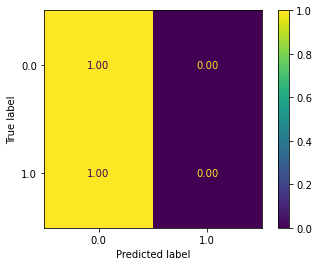

In [133]:
plot_confusion_matrix(best_forest, X_test_clean, y_test, normalize='true', values_format = '.2f')
plt.savefig('images/forrest_conf_matrix.png');

Looks like we won't be using this model since it fails to ever predict a fatal crash

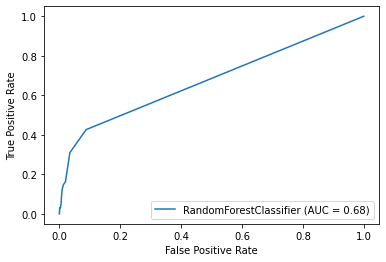

In [138]:
plot_roc_curve(best_forest, X_test_clean, y_test)
plt.savefig('images/forest_roc.png');

In [47]:
print_metrics(y_test, forrest_test_preds)

Precision Score: 0.0
Recall Score: 0.0
Accuracy Score: 0.9986485794727412
F1 Score: 0.0


In [82]:
forrest_features = list(zip(best_forest.feature_importances_, X_train_resampled.columns.values))
forrest_features = sorted(forrest_features, key=lambda x: x[0], reverse=True)
forrest_features_values = [x[0] for x in forrest_features][:5]
forrest_features_names = [x[1] for x in forrest_features][:5]

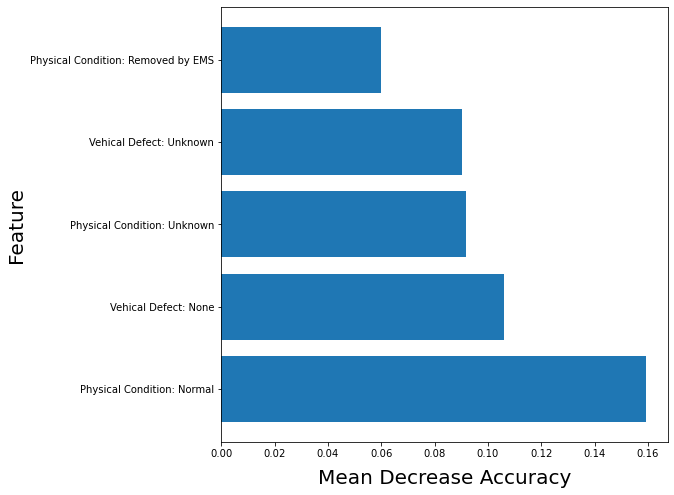

In [134]:
plt.figure(figsize=(8,8))
forrest_labels = ['Physical Condition: Normal', 'Vehical Defect: None', 'Physical Condition: Unknown',
                  'Vehical Defect: Unknown','Physical Condition: Removed by EMS']

plt.barh(forrest_features_names, forrest_features_values, align='center', tick_label=forrest_labels)
plt.xlabel('Mean Decrease Accuracy', fontsize=20, labelpad=10)
plt.ylabel('Feature', fontsize=20)
plt.savefig('images/forest_feature_plot.png');

In [50]:
forest_cv_df = pd.DataFrame(forrest_grid_search.cv_results_)
forest_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,41.850999,0.761358,0.984590,0.030435,sqrt,1,2,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.997352,0.999966,0.999966,0.999940,0.999949,0.999435,0.001041,1
1,41.781056,1.573100,0.981821,0.030089,sqrt,1,5,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.997369,0.999932,0.999974,0.999915,0.999932,0.999424,0.001028,3
2,41.867234,0.875400,0.980139,0.027985,sqrt,1,10,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.997378,0.999923,0.999957,0.999923,0.999915,0.999419,0.001021,4
3,41.255589,1.402057,0.959210,0.034043,sqrt,2,2,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.997395,0.999880,0.999915,0.999872,0.999898,0.999392,0.000999,7
4,42.523286,1.516671,0.955736,0.028170,sqrt,2,5,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.997369,0.999932,0.999898,0.999855,0.999906,0.999392,0.001012,7


## Final Model Evaluation

Decision Tree:

* Accuracy: 0.9180
* AUC: 0.79
* Precision: 0.0079
* Recall: 0.4884
* F1 Score: 0.0155

This final model is excellent at predicting whether or not a car crash is fatal. Therefore, this model should be used by car companies as a safety feature in their vehicles to help 911 dispatchers determine whether or not certain crashes are a priority or not.